#**데이터 불러오기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#라이브러리 가지고 오기
#numpy : C언어로 구현된 파이썬 라이브러리로써, 고성능의 수치계산을 위해 제작
#scipy : 과학 컴퓨팅과 기술 컴퓨팅에 사용되는 자유-오픈 소스 파이썬 라이브러리
#pandas : 데이터 조작 및 분석을 위한 Python 프로그래밍 언어 용으로 작성된 소프트웨어 라이브러리
#matplotlib : 파이썬에서 데이타를 차트나 플롯(Plot)으로 그려주는 라이브러리 패키지
#matplotlib.pyplot : 각각의 함수를 사용해서 간편하게 그래프를 만들고 변화를 줌
#seaborn : Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 읽기
data = pd.io.stata.read_stata('/content/drive/My Drive/t-project/lendingclub.dta')

##**분석 데이터 목록**

1) 'loan_amnt' - 대출자의 대출 총액 (빌리고 싶은 돈)


2) 'funded_amnt' - 해당 대출을 위해 모금된 총액 (모인 돈)


3) 'funded_amnt_inv' - 해당 시점에 투자자가 약정한 총액 (대출자에게 지급된 금액의 양)


4) 'int_rate' - 대출에 대한 이자율


5) 'installment' - 대출 이후 대출자(차용인/돈빌린사람)가 내야하는 월별 지불액


6) 'annual_inc' - 대출자가 제공한 연소득 (대출자 본인이 신고한 금액)


7) 'dti' - 주택담보대출과 신용대출을 제외한 총 채무액에 대한 차입자의 월별 총 상환액을 차입자의 자가신고 월 소득으로 나눈 비율 
(돈을 빌린 사람이 매월 갚는 금액 / 돈을 빌린 사람의 월소득)
=> dti 초과 : 월소득으로 해결 불가능
=> dti 이하 : 월소득으로 해결 가능
=> 주택담보대출과 신용대출을 제외했기에 1 이하라고 하더라도 1과 가까운 경우, 주담대와 신용대출이 존재하는 경우에 차입자의 상황이 여유롭다고 볼 수 없음

8) 'delinq_2yrs' - 지난 2년 동안 대출자의 신용 파일에서 30일 이상 연체 발생 건수 (30일 이상 돈을 갚지 못한 경우)


* FICO - 신용점수 산출 프로그램
9) 'fico_range_low' - 대출 시 대출자의 FICO가 속하는 하한 범위


10) 'fico_range_high' - 대출 시 대출자의 FICO가 속하는 상한 범위


11) 'issue_d' - 대출을 위해 기금이 모금된 월


* 연속형 변수
4) 'int_rate'
7) 'dti' 

* 범주형 변수
1) 'loan_amnt'
2) 'funded_amnt'
5) 'installment'
6) 'annual_inc' 
8) 'delinq_2yrs'
9) 'fico_range_low'
10) 'fico_range_high'
11) 'issue_d'

##**Lending club 데이터셋 분석**

In [ ]:
# 데이터의 colums 확인
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high',
       ...
       'mths_since_recent_revol_delinq2', 'mths_since_recent_revol_delinq3',
       'mths_since_recent_revol_delinq4', 'mths_since_recent_revol_delinq5',
       'mths_since_recent_revol_delinq6', 'mths_since_recent_revol_delinq7',
       'mths_since_recent_revol_delinq8', 'mths_since_recent_revol_delinq9',
       'mths_since_recent_revol_delinq10', 'mths_since_recent_revol_delinq11'],
      dtype='object', length=333)

In [ ]:
#lendingclub df의 행과 열의 크기 출력
data.shape

(1092919, 333)

In [ ]:
# 정보 확인 - df(데이터프레임)을 구성하는 행과 열의 크기, 컬럼명, 컬럼 값의 자료형 등
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092919 entries, 0 to 1092918
Columns: 333 entries, loan_amnt to mths_since_recent_revol_delinq11
dtypes: float32(2), float64(16), int16(6), int32(6), int8(303)
memory usage: 503.4 MB


In [ ]:
# 각 변수에 대한 정보 확인
reader = pd.io.stata.StataReader('/content/drive/My Drive/t-project/lendingclub.dta')
header = reader.variable_labels()
for var in header:
    name = var
    label = header[name]
    print(name, label)

loan_amnt 
funded_amnt 
funded_amnt_inv 
int_rate 
installment 
annual_inc 
dti 
delinq_2yrs 
fico_range_low 
fico_range_high 
inq_last_6mths 
open_acc 
pub_rec 
revol_bal 
revol_util 
total_acc 
out_prncp 
out_prncp_inv 
total_pymnt 
total_pymnt_inv 
total_rec_prncp 
total_rec_int 
total_rec_late_fee 
recoveries 
collection_recovery_fee 
last_pymnt_amnt 
last_fico_range_high 
last_fico_range_low 
collections_12_mths_ex_med 
acc_now_delinq 
tot_coll_amt 
tot_cur_bal 
chargeoff_within_12_mths 
delinq_amnt 
pub_rec_bankruptcies 
tax_liens 
emp_length1 emp_length==1 year
emp_length2 emp_length==10+ years
emp_length3 emp_length==2 years
emp_length4 emp_length==3 years
emp_length5 emp_length==4 years
emp_length6 emp_length==5 years
emp_length7 emp_length==6 years
emp_length8 emp_length==7 years
emp_length9 emp_length==8 years
emp_length10 emp_length==9 years
emp_length11 emp_length==< 1 year
emp_length12 emp_length==n/a
home_ownership1 home_ownership==ANY
home_ownership2 home_ownership==MOR

In [ ]:
# 시리즈 내 각각의 값 세기 - 각 컬럼 내에 각각의 값이 나온 횟수 확인 
# data['컬럼명'].value_counts()
# data['컬럼명'].value_counts(normalize=True)   => %로 확인하기

# **결측치 확인**

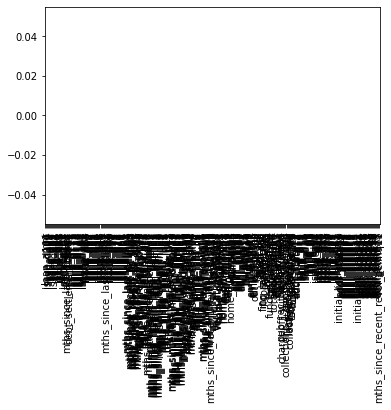

In [ ]:
# 데이터 결측치 시각화 1
nulls = data.isnull().sum(axis=0)
nulls.sort_values().plot(kind='bar',)

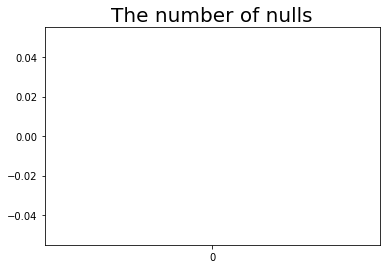

In [ ]:
# 데이터 결측치 시각화 2
sns.barplot(data=nulls, x=nulls.index, y=nulls.values)
plt.title('The number of nulls', fontsize=20)
plt.figsize = (19,16)

In [ ]:
# 데이터 전체에 대해 결측치 확인 작업

# 결과를 생략없이 출력하기 위한 코드
pd.set_option('display.max_rows', None)

# 결측값 여부 확인 - isnull().sum() : 각 컬럼별 결측치가 몇개가 있는지 카운트
data.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
int_rate                            0
installment                         0
annual_inc                          0
dti                                 0
delinq_2yrs                         0
fico_range_low                      0
fico_range_high                     0
inq_last_6mths                      0
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                          0
total_acc                           0
out_prncp                           0
out_prncp_inv                       0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_prncp                     0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
last_pymnt_amnt                     0
last_fico_ra

## **결측치 측정 결과 : lendingclub 데이터 내 어떤 컬럼에도 결측값이 존재하지 않음**

## **데이터 작업**

In [ ]:
# loan_amnt를 기준으로 오름차순 정렬한 데이터 프레임 생성 'df_test'
df_test = data.sort_values(by=['loan_amnt'])

In [ ]:
# 원 데이터의 상위 값 5개
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,...,mths_since_recent_bc4,mths_since_recent_bc5,mths_since_recent_bc6,mths_since_recent_bc7,mths_since_recent_bc8,mths_since_recent_bc9,mths_since_recent_bc10,mths_since_recent_bc11,mths_since_recent_bc_dlq1,mths_since_recent_bc_dlq2,mths_since_recent_bc_dlq3,mths_since_recent_bc_dlq4,mths_since_recent_bc_dlq5,mths_since_recent_bc_dlq6,mths_since_recent_bc_dlq7,mths_since_recent_bc_dlq8,mths_since_recent_bc_dlq9,mths_since_recent_bc_dlq10,mths_since_recent_bc_dlq11,mths_since_recent_inq1,mths_since_recent_inq2,mths_since_recent_inq3,mths_since_recent_inq4,mths_since_recent_inq5,mths_since_recent_inq6,mths_since_recent_inq7,mths_since_recent_inq8,mths_since_recent_inq9,mths_since_recent_inq10,mths_since_recent_revol_delinq1,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
0,19000,19000,19000.0,0.0916,605.62,65000.0,16.36,1,670,674,0,10,0,10644,0.714,27,0.0,0.0,20635.862570,20635.86,19000.00,1635.86,0.0,0.0,0.0,13387.76,734,730,0,0,0,33375,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
1,10000,10000,10000.0,0.0789,312.86,58000.0,5.03,0,690,694,1,5,0,7940,0.684,6,0.0,0.0,10185.630000,10185.63,10000.00,185.63,0.0,0.0,0.0,9568.68,694,690,0,0,0,151309,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,6000,6000,6000.0,0.1147,197.78,46900.0,24.23,2,665,669,1,9,0,4161,0.257,14,0.0,0.0,7112.021631,7112.02,6000.00,1112.02,0.0,0.0,0.0,197.37,579,575,0,0,0,19337,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,25200,25200,25200.0,0.1199,836.89,76280.0,32.87,0,685,689,0,5,1,7755,0.566,34,0.0,0.0,16704.230000,16704.23,12882.27,3821.96,0.0,0.0,0.0,836.89,564,560,0,0,0,59295,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8000,8000,8000.0,0.1299,269.52,29000.0,20.28,0,770,774,1,12,0,6324,0.160,15,0.0,0.0,9627.310205,9627.31,8000.00,1627.31,0.0,0.0,0.0,1831.86,684,680,0,0,0,29418,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 정렬한 데이터의 상위 값 5개
df_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,...,mths_since_recent_bc4,mths_since_recent_bc5,mths_since_recent_bc6,mths_since_recent_bc7,mths_since_recent_bc8,mths_since_recent_bc9,mths_since_recent_bc10,mths_since_recent_bc11,mths_since_recent_bc_dlq1,mths_since_recent_bc_dlq2,mths_since_recent_bc_dlq3,mths_since_recent_bc_dlq4,mths_since_recent_bc_dlq5,mths_since_recent_bc_dlq6,mths_since_recent_bc_dlq7,mths_since_recent_bc_dlq8,mths_since_recent_bc_dlq9,mths_since_recent_bc_dlq10,mths_since_recent_bc_dlq11,mths_since_recent_inq1,mths_since_recent_inq2,mths_since_recent_inq3,mths_since_recent_inq4,mths_since_recent_inq5,mths_since_recent_inq6,mths_since_recent_inq7,mths_since_recent_inq8,mths_since_recent_inq9,mths_since_recent_inq10,mths_since_recent_revol_delinq1,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
242916,1000,1000,1000.0,0.1349,33.94,37000.0,25.36,0,685,689,1,19,5,1824,0.829,27,0.0,0.0,1173.397584,1173.40,1000.0,173.40,0.0,0.0,0.0,530.41,589,585,0,0,652,194534,0,0,0,4,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
358418,1000,1000,1000.0,0.1399,34.18,62400.0,30.07,0,670,674,0,12,0,25731,0.861,36,0.0,0.0,1169.968358,1169.97,1000.0,169.97,0.0,0.0,0.0,587.16,659,655,0,0,0,37341,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
428917,1000,1000,1000.0,0.2240,38.40,55000.0,11.61,1,670,674,0,6,0,1457,0.265,17,0.0,0.0,1382.283216,1382.28,1000.0,382.28,0.0,0.0,0.0,38.28,689,685,0,0,0,8524,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
358413,1000,1000,1000.0,0.1349,33.94,84000.0,13.63,0,665,669,1,8,0,3937,0.984,27,0.0,0.0,1189.248762,1189.25,1000.0,189.25,0.0,0.0,0.0,443.32,564,560,0,0,0,48392,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
333046,1000,1000,1000.0,0.1399,34.18,17000.0,14.90,1,685,689,2,3,0,1382,0.072,4,0.0,0.0,1285.453936,1285.45,1000.0,225.45,60.0,0.0,0.0,250.78,574,570,0,0,0,1700,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# 정렬한 데이터의 하위 값 5개
df_test.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,...,mths_since_recent_bc4,mths_since_recent_bc5,mths_since_recent_bc6,mths_since_recent_bc7,mths_since_recent_bc8,mths_since_recent_bc9,mths_since_recent_bc10,mths_since_recent_bc11,mths_since_recent_bc_dlq1,mths_since_recent_bc_dlq2,mths_since_recent_bc_dlq3,mths_since_recent_bc_dlq4,mths_since_recent_bc_dlq5,mths_since_recent_bc_dlq6,mths_since_recent_bc_dlq7,mths_since_recent_bc_dlq8,mths_since_recent_bc_dlq9,mths_since_recent_bc_dlq10,mths_since_recent_bc_dlq11,mths_since_recent_inq1,mths_since_recent_inq2,mths_since_recent_inq3,mths_since_recent_inq4,mths_since_recent_inq5,mths_since_recent_inq6,mths_since_recent_inq7,mths_since_recent_inq8,mths_since_recent_inq9,mths_since_recent_inq10,mths_since_recent_revol_delinq1,mths_since_recent_revol_delinq2,mths_since_recent_revol_delinq3,mths_since_recent_revol_delinq4,mths_since_recent_revol_delinq5,mths_since_recent_revol_delinq6,mths_since_recent_revol_delinq7,mths_since_recent_revol_delinq8,mths_since_recent_revol_delinq9,mths_since_recent_revol_delinq10,mths_since_recent_revol_delinq11
163072,40000,40000,39750.0,0.0916,1274.98,250000.0,13.61,0,780,784,0,11,0,31514,0.438,39,0.0,0.0,43359.88402,43088.88,40000.0,3359.88,0.0,0.0,0.0,20325.85,814,810,0,0,0,404108,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
162995,40000,40000,40000.0,0.1147,1318.47,80000.0,21.48,0,725,729,0,14,0,74391,0.582,37,0.0,0.0,45850.51442,45850.51,40000.0,5850.51,0.0,0.0,0.0,20825.07,749,745,0,0,0,219308,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
369808,40000,40000,40000.0,0.1599,1406.09,130000.0,20.89,0,690,694,0,7,0,20139,0.763,23,0.0,0.0,43580.12908,43580.13,40000.0,3580.13,0.0,0.0,0.0,35179.12,749,745,0,0,0,68349,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
102557,40000,40000,40000.0,0.0949,1281.14,225000.0,20.49,1,695,699,0,16,0,69166,0.493,32,0.0,0.0,44322.93044,44322.93,40000.0,4322.93,0.0,0.0,0.0,23866.87,724,720,0,0,0,561707,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
277483,40000,40000,39950.0,0.0749,1244.07,165000.0,16.24,1,705,709,0,19,0,7249,0.164,47,0.0,0.0,44337.18173,44281.76,40000.0,4337.18,0.0,0.0,0.0,15632.02,729,725,0,0,0,218329,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# 정렬한 데이터 셋에서 필요한 칼럼만 추출한 데이터 프레임 생성
df_test_part = df_test[ ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'issue_d1', 'issue_d2', 'issue_d3', 'issue_d4', 'issue_d5', 'issue_d6', 'issue_d7', 'issue_d8', 'issue_d9', 'issue_d10', 'issue_d11', 'issue_d12', 'issue_d13', 'issue_d14', 'issue_d15', 'issue_d16', 'issue_d17', 'issue_d18', 'issue_d19', 'issue_d20', 'issue_d21', 'issue_d22', 'issue_d23', 'issue_d24', 'issue_d25', 'issue_d26', 'issue_d27', 'issue_d28', 'issue_d29', 'issue_d30', 'issue_d31', 'issue_d32', 'issue_d33', 'issue_d34', 'issue_d35', 'issue_d36', 'issue_d37', 'issue_d38', 'issue_d39', 'issue_d40', 'issue_d41', 'issue_d42', 'issue_d43', 'issue_d44', 'issue_d45', 'issue_d46', 'issue_d47', 'issue_d48', 'issue_d49', 'issue_d50', 'issue_d51', 'issue_d52', 'issue_d53', 'issue_d54', 'issue_d55', 'issue_d56', 'issue_d57', 'issue_d58', 'issue_d59', 'issue_d60', 'issue_d61', 'issue_d62', 'issue_d63', 'issue_d64', 'issue_d65', 'issue_d66', 'issue_d67', 'issue_d68', 'issue_d69', 'issue_d70', 'issue_d71', 'issue_d72', 'issue_d73', 'issue_d74', 'issue_d75', 'issue_d76', 'issue_d77', 'issue_d78', 'issue_d79', 'issue_d80', 'issue_d81', 'issue_d82', 'issue_d83', 'issue_d84', 'issue_d85', 'issue_d86', 'issue_d87', 'issue_d88', 'issue_d89', 'issue_d90', 'issue_d91', 'issue_d92', 'issue_d93', 'issue_d94', 'issue_d95', 'issue_d96', 'issue_d97', 'issue_d98', 'issue_d99', 'issue_d100', 'issue_d101', 'issue_d102', 'issue_d103', 'issue_d104', 'issue_d105', 'issue_d106', 'issue_d107', 'issue_d108', 'issue_d109', 'issue_d110', 'issue_d111', 'issue_d112', 'issue_d113', 'issue_d114', 'issue_d115', 'issue_d116', 'issue_d117', 'issue_d118']]

In [ ]:
df_test_part.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1092919 entries, 242916 to 277483
Columns: 128 entries, loan_amnt to issue_d118
dtypes: float64(5), int16(2), int32(2), int8(119)
memory usage: 186.6 MB


In [ ]:
df_test_part.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high',
       ...
       'issue_d109', 'issue_d110', 'issue_d111', 'issue_d112', 'issue_d113',
       'issue_d114', 'issue_d115', 'issue_d116', 'issue_d117', 'issue_d118'],
      dtype='object', length=128)

In [ ]:
df_test_part.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,issue_d1,issue_d2,issue_d3,issue_d4,issue_d5,issue_d6,issue_d7,issue_d8,issue_d9,issue_d10,issue_d11,issue_d12,issue_d13,issue_d14,issue_d15,issue_d16,issue_d17,issue_d18,issue_d19,issue_d20,issue_d21,issue_d22,issue_d23,issue_d24,issue_d25,issue_d26,issue_d27,issue_d28,issue_d29,issue_d30,...,issue_d79,issue_d80,issue_d81,issue_d82,issue_d83,issue_d84,issue_d85,issue_d86,issue_d87,issue_d88,issue_d89,issue_d90,issue_d91,issue_d92,issue_d93,issue_d94,issue_d95,issue_d96,issue_d97,issue_d98,issue_d99,issue_d100,issue_d101,issue_d102,issue_d103,issue_d104,issue_d105,issue_d106,issue_d107,issue_d108,issue_d109,issue_d110,issue_d111,issue_d112,issue_d113,issue_d114,issue_d115,issue_d116,issue_d117,issue_d118
242916,1000,1000,1000.0,0.1349,33.94,37000.0,25.36,0,685,689,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
358418,1000,1000,1000.0,0.1399,34.18,62400.0,30.07,0,670,674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
428917,1000,1000,1000.0,0.2240,38.40,55000.0,11.61,1,670,674,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
358413,1000,1000,1000.0,0.1349,33.94,84000.0,13.63,0,665,669,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
333046,1000,1000,1000.0,0.1399,34.18,17000.0,14.90,1,685,689,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_test_part.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,issue_d1,issue_d2,issue_d3,issue_d4,issue_d5,issue_d6,issue_d7,issue_d8,issue_d9,issue_d10,issue_d11,issue_d12,issue_d13,issue_d14,issue_d15,issue_d16,issue_d17,issue_d18,issue_d19,issue_d20,issue_d21,issue_d22,issue_d23,issue_d24,issue_d25,issue_d26,issue_d27,issue_d28,issue_d29,issue_d30,...,issue_d79,issue_d80,issue_d81,issue_d82,issue_d83,issue_d84,issue_d85,issue_d86,issue_d87,issue_d88,issue_d89,issue_d90,issue_d91,issue_d92,issue_d93,issue_d94,issue_d95,issue_d96,issue_d97,issue_d98,issue_d99,issue_d100,issue_d101,issue_d102,issue_d103,issue_d104,issue_d105,issue_d106,issue_d107,issue_d108,issue_d109,issue_d110,issue_d111,issue_d112,issue_d113,issue_d114,issue_d115,issue_d116,issue_d117,issue_d118
count,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,1092919.0,...,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06,1.092919e+06
mean,1.364630e+04,1.364628e+04,1.364033e+04,1.263927e-01,4.312534e+02,7.562999e+04,1.818105e+01,3.394543e-01,6.942867e+02,6.982868e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.373386e-02,1.429566e-02,1.396169e-02,1.510084e-02,1.743954e-02,1.746699e-02,1.571388e-02,2.679613e-02,1.720713e-02,9.694223e-03,3.546283e-02,2.290380e-02,9.417898e-03,3.207008e-02,2.167773e-02,2.311791e-02,2.160361e-02,1.970411e-02,1.743405e-02,2.822350e-02,2.189458e-02,1.716230e-02,3.033894e-02,2.303190e-02,2.763517e-02,2.052485e-02,2.577867e-02,4.019237e-02,2.533308e-02,1.960713e-02,2.242618e-02,2.320392e-02,2.481977e-02,1.924845e-02,2.204555e-02,2.311059e-02,2.463769e-02,2.109946e-02,1.784579e-02,2.405851e-02
std,8.441163e+03,8.441145e+03,8.438033e+03,4.361999e-02,2.652486e+02,8.994245e+04,8.321510e+00,9.065449e-01,3.061425e+01,3.061490e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.163841e-01,1.187068e-01,1.173319e-01,1.219542e-01,1.309023e-01,1.310035e-01,1.243663e-01,1.614872e-01,1.300425e-01,9.798088e-02,1.849466e-01,1.495969e-01,9.658784e-02,1.761863e-01,1.456291e-01,1.502780e-01,1.453854e-01,1.389816e-01,1.308821e-01,1.656109e-01,1.463394e-01,1.298760e-01,1.715183e-01,1.500048e-01,1.639253e-01,1.417872e-01,1.584745e-01,1.964102e-01,1.571348e-01,1.386460e-01,1.480651e-01,1.505507e-01,1.555756e-01,1.373971e-01,1.468318e-01,1.502548e-01,1.550184e-01,1.437160e-01,1.323908e-01,1.532309e-01
min,1.000000e+03,1.000000e+03,7.750000e+02,5.320000e-02,4.930000e+00,3.000000e+03,-1.000000e+00,0.000000e+00,6.600000e+02,6.640000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_columns', None)
df_test_part.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,issue_d1,issue_d2,issue_d3,issue_d4,issue_d5,issue_d6,issue_d7,issue_d8,issue_d9,issue_d10,issue_d11,issue_d12,issue_d13,issue_d14,issue_d15,issue_d16,issue_d17,issue_d18,issue_d19,issue_d20,issue_d21,issue_d22,issue_d23,issue_d24,issue_d25,issue_d26,issue_d27,issue_d28,issue_d29,issue_d30,issue_d31,issue_d32,issue_d33,issue_d34,issue_d35,issue_d36,issue_d37,issue_d38,issue_d39,issue_d40,issue_d41,issue_d42,issue_d43,issue_d44,issue_d45,issue_d46,issue_d47,issue_d48,issue_d49,issue_d50,issue_d51,issue_d52,issue_d53,issue_d54,issue_d55,issue_d56,issue_d57,issue_d58,issue_d59,issue_d60,issue_d61,issue_d62,issue_d63,issue_d64,issue_d65,issue_d66,issue_d67,issue_d68,issue_d69,issue_d70,issue_d71,issue_d72,issue_d73,issue_d74,issue_d75,issue_d76,issue_d77,issue_d78,issue_d79,issue_d80,issue_d81,issue_d82,issue_d83,issue_d84,issue_d85,issue_d86,issue_d87,issue_d88,issue_d89,issue_d90,issue_d91,issue_d92,issue_d93,issue_d94,issue_d95,issue_d96,issue_d97,issue_d98,issue_d99,issue_d100,issue_d101,issue_d102,issue_d103,issue_d104,issue_d105,issue_d106,issue_d107,issue_d108,issue_d109,issue_d110,issue_d111,issue_d112,issue_d113,issue_d114,issue_d115,issue_d116,issue_d117,issue_d118
count,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000,1092919.0000
mean,13646.3020,13646.2807,13640.3299,0.1264,431.2534,75629.9910,18.1811,0.3395,694.2867,698.2868,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0008,0.0055,0.0057,0.0058,0.0055,0.0063,0.0069,0.0076,0.0086,0.0095,0.0100,0.0109,0.0116,0.0119,0.0129,0.0135,0.0137,0.0143,0.0140,0.0151,0.0174,0.0175,0.0157,0.0268,0.0172,0.0097,0.0355,0.0229,0.0094,0.0321,0.0217,0.0231,0.0216,0.0197,0.0174,0.0282,0.0219,0.0172,0.0303,0.0230,0.0276,0.0205,0.0258,0.0402,0.0253,0.0196,0.0224,0.0232,0.0248,0.0192,0.0220,0.0231,0.0246,0.0211,0.0178,0.0241
std,8441.1627,8441.1447,8438.0329,0.0436,265.2486,89942.4549,8.3215,0.9065,30.6143,30.6149,0.0000,

# **1-중요) 'loan_amnt' - 대출자의 대출 총액 (빌리고 싶은 돈)**

총 자료 수 : 1,092,919개

최대 : 40,000

최소 : 1,000

평균 : 약 13,646

백분위 25% : 약 7,125

백분위 50% : 약 12,000

백분위 75% : 약 19,000

* 75%에 해당하는 사람이 약 19,000 이하의 금액으로 대출 희망함을 알 수 있음

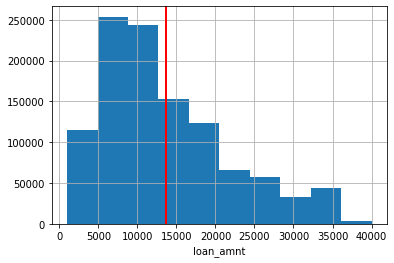

In [ ]:
# 히스토그램 - 희망 대출액의 분포 현황
plt.xlabel("loan_amnt")
plt.axvline(x = df_test_part.loan_amnt.mean(), linewidth = 2, color = 'r')
df_test_part.loan_amnt.hist()

히스토그램 분석 : 왼쪽으로 치우쳐 있음

이유 : 19,000 이하 금액으로 대출을 희망하는 경우가 많기 때문

<논문 내용>

**차입자의 대출신청금액이 많을수록 채무불이행 확률이 높은 것**으로 나타났고, 대출 목적 또한 P2P 대출거래의 채무불이행에 유의한 영향을 미치는 것으로 나타났다. 주택구입 비용, 생활비, 의료비 등의 생계필수비용 목적으로 대출받은 차입자의 경우 채무불이행률이 낮은 것으로 나타났다.

출처 : 인공지능기법을 이용한 온라인 P2P 대출거래의 채무불이행 예측에 관한 실증연구


# **2-X) 'funded_amnt' - 해당 대출을 위해 모금된 총액 (모인 돈)**

총 자료 수 : 1,092,919개

최대 : 40,000

최소 : 1,000

평균 : 약 13,646

백분위 25% : 약 7,100

백분위 50% : 약 11,950

백분위 75% : 약 19,000

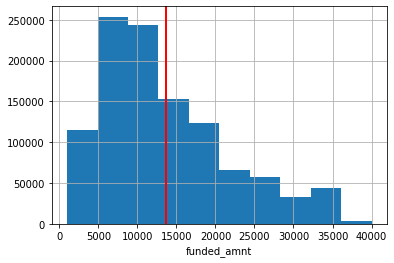

In [ ]:
plt.xlabel("funded_amnt")
plt.axvline(x = df_test_part.funded_amnt.mean(), linewidth = 2, color = 'r')
data.funded_amnt.hist()

히스토그래 분석 : 왼쪽으로 치우쳐 있음

이유 : loan_amnt의 값에 영향을 받기 때문

<유추 내용>

**1) loan_amnt와 funded_amnt의 차가 굉장히 작기 때문에, 대출자의 대출 희망액이 대부분 모금이 이루어졌다고 볼 수 있음**

## **loan_amnt와 funded_amnt 비교하기**

목적 : 대출자의 대출 총액과 모금 총액이 일치하는지 확인

In [ ]:
# 대출 희망 금액의 총액
loan_sum = df_test_part.loan_amnt.sum()
loan_sum

14914302700

In [ ]:
# 모금된 금액의 총액
funded_sum = df_test_part.funded_amnt.sum()
funded_sum

14914279500

In [ ]:
# 대출 희망 금액의 총액과 모금된 금액의 총액의 차 
# => 차의 값이 클수록 대출 모금이 제대로 이루어지지 않았다고 볼 수 있다고 판단
loan_sum - funded_sum

23200

# **3-X) 'funded_amnt_inv' - 해당 시점에 투자자가 약정한 총액 (대출자에게 지급된 금액 양)**

총 자료 수 : 1,092,919개

최대 : 40,000

최소 : 775

평균 : 약 13,640

백분위 25% : 약 7,100

백분위 50% : 약 11,950

백분위 75% : 약 19,000

=> 최소 금액이 loan_amnt, funded_amnt와 다른 것으로 보아, 실제 대출자에게 지급된 양이 대출희망액/모금액과 다른 부분이 있음을 확인 가능

=> 그럼에도 불구하고 loan_amnt, funded_amnt, funded_amnt_inv가 일치함을 확인 가능 

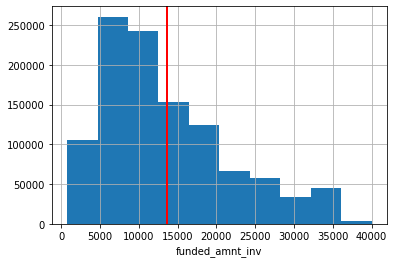

In [ ]:
plt.xlabel("funded_amnt_inv")
plt.axvline(x = df_test_part.funded_amnt_inv.mean(), linewidth = 2, color = 'r')
df_test_part.funded_amnt_inv.hist()

히스토그래 분석 : 왼쪽으로 치우쳐 있음

이유 : funded_amnt에 영향을 받기 때문



<유추 내용>

1) 최소 금액(775)이 loan_amnt, funded_amnt와 다른 것으로 보아, 실제 대출자에게 지급된 양이 대출희망액/모금액과 다른 부분이 있음을 확인 가능

**2) 그럼에도 불구하고 loan_amnt, funded_amnt, funded_amnt_inv가 일치함을 확인 가능**

## **loan_amnt, funded_amn, funded_amnt, funded_amnt_inv 값 비교**

목적 : 대출자의 대출 총액과 모금 총액, 실제 지급액이 일치하는지 확인

In [ ]:
funded_inv_sum = df_test_part.funded_amnt_inv.sum()
funded_inv_sum

14907775739.952229

In [ ]:
loan_sum - funded_inv_sum

6526960.047771454

In [ ]:
funded_sum - funded_inv_sum

6503760.047771454

In [ ]:
# 상관관계 분석
data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv']].corr()

,loan_amnt,funded_amnt,funded_amnt_inv
loan_amnt,1.000000,0.999999,0.999993
funded_amnt,0.999999,1.000000,0.999994
funded_amnt_inv,0.999993,0.999994,1.000000


loan_amnt - funded_amnt 에 비하여,

값 차이가 많이 남을 알 수 있음. 그럼에도 총액과 비교하였을 때 1%도 해당되지 않은 미미한 금액임.

**결론적으로, loan_amnt, funded_amnt, funded_amnt_inv 이 거의 동일하다고 판단**

# **4-중요) 'int_rate' - 대출에 대한 이자율**

총 자료 수 : 1,092,919개

최대 : 0.3099

최소 : 0.0532

평균 : 약 0.1264

백분위 25% : 약 0.0917

백분위 50% : 약 0.1229

백분위 75% : 약 0.1531

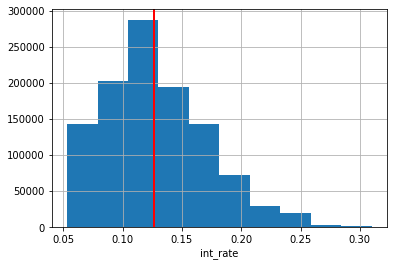

In [ ]:
plt.xlabel("int_rate")
plt.axvline(x = df_test_part.int_rate.mean(), linewidth = 2, color = 'r')
df_test_part.int_rate.hist()

## **lendingclub의 interest rate 산정 원칙**
###**interest rate는 lending club이 신용등급을 감안하여 결정함**

즉, 신용등급(loan grade)별 대출금리가 달라진다는 것. 

출처 : BS투자증권 분석자료

참고) loan_amnt가 클수록 interate rate도 무조건 큰 것은 아님.

<기본 원칙 :interest rate는 도중 변하지 않음>

LendingClub loans are fixed-rate loans, that number (as well as your monthly payment and interest rate) won’t change over time.



<interest rate를 줄일 수 있는 방법>

: 추가 상환 및 조기 상환

If you want to reduce the amount of interest you pay over the life of your loan, you can make extra payments or pay off your loan in full at any time—as noted above, you won’t see any penalties or fees for paying your loan off ahead of schedule.

<논문 내용>

세계적인 P2P 대출업체인 렌딩클럽(Lending Club)의 공개용 데이터베이스(http://www.lendingclub.com)를 활용하고 통계기법과 인공지능기반의 P2P 대출거래 채무불이행 예측모형을 구축하고자 한다.

연구결과, P2P 대출거래의 채무 불이행 예측을 위해 우선 고려해야 할 변수는 **대출이자율**이며, 중요도 3순위에 가장 많이 언급된 **대출금액**과 **총부채상환비율**도 고려해야 할 요인으로 추출되었다.

판별분석에서는 P2P 채무불이행 여부
에 가장 영향력 있는 변수로 **대출이자율이 선정되었고, 다음으로 대출이자율, 대출금액, 신용파산기록, 모기지대출계좌수, 총부채상환비율 순으로 중요도가 분류**되었다. 

로짓분석의 경우에도 **대출이자율이 채무불이행 예측에 가장 영향력 있는 변수로 선정되었고, 다음으로 총부채상환비율, 대출금액, 총신용사용금액/신용한도, 신용
조회건수 등이 영향력 있는 변수로 판별**되었다

출처 : 인공지능기법을 이용한 온라인 P2P 대출거래의 채무불이행 예측에 관한 실증연구

참고)

신용 등급 산출 방식 : 빌리는 사람의 신용 기록 등을 바탕으로 산출

Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest.

출처 : https://www.investopedia.com/terms/l/loan-grading.asp

# **5-X) 'installment' - 대출 이후 대출자(차용인/돈빌린사람)가 내야하는 월별 지불액**

총 자료 수 : 1,092,919개

최대 : 약 1,715

최소 : 약 4.93

평균 : 약 431

백분위 25% : 약 236

백분위 50% : 약 362

백분위 75% : 약 573

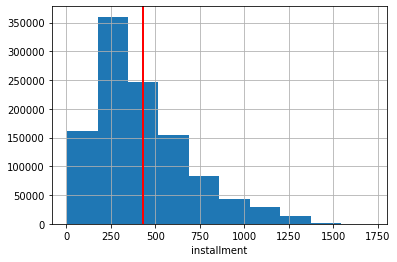

In [ ]:
plt.xlabel("installment")
plt.axvline(x = df_test_part.installment.mean(), linewidth = 2, color = 'r')
data.installment.hist()

<자체 분석>

installment은 쉽게 말해, 대출 할부금이라고 할 수 있음. 



# **6-X) 'annual_inc' - 대출자가 제공한 연소득 (대출자 본인이 신고한 금액)**

총 자료 수 : 1,092,919개

최대 : 61,000,000

최소 : 3,000

평균 : 약 75,629 

백분위 25% : 약 45,000

백분위 50% : 약 64,000

백분위 75% : 약 90,000

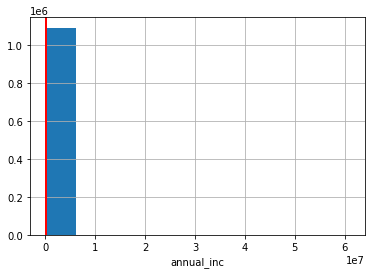

In [ ]:
# annual_inc 전체로 보았을 때 히스토그램
plt.xlabel("annual_inc")
plt.axvline(x = df_test_part.annual_inc.mean(), linewidth = 2, color = 'r')
data.annual_inc.hist()

###**annual_inc 데이터 분석 실시**

정보를 끌어내기 어렵다고 판단했기 때문

In [ ]:
df_annual_inc = data[['annual_inc']]

In [ ]:
df_annual_inc.head()

,annual_inc
0,65000.0
1,58000.0
2,46900.0
3,76280.0
4,29000.0


=> 원 데이터의 상위 값 5개를 확인하였을 때, 다양한 값들이 존재함을 확인

In [ ]:
# 백분위 세분화하여 값 확인
pd.options.display.float_format = '{:.4f}'.format
df_annual_inc.describe(percentiles=[.25, .50, .75, .80, .90, .95, .99])

,annual_inc
count,1092919.0000
mean,75629.9910
std,89942.4549
min,3000.0000
25%,45000.0000
50%,64000.0000
75%,90000.0000
80%,100000.0000
90%,125000.0000
95%,155000.0000


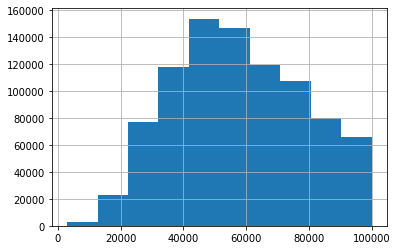

In [ ]:
# 백분위 80까지
df_annual_1 = data[data['annual_inc'] <= 100000]
df_annual_1.annual_inc.hist()

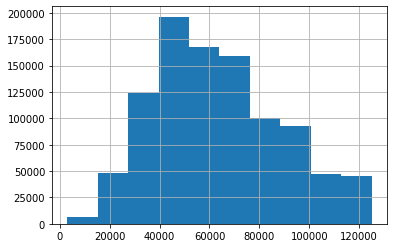

In [ ]:
# 백분위 90까지
df_annual_2 = data[data['annual_inc'] <= 125000]
df_annual_2.annual_inc.hist()

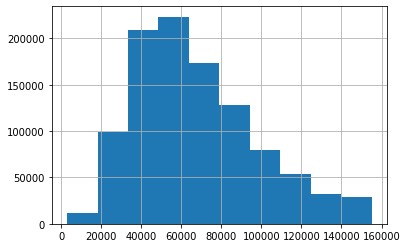

In [ ]:
# 백분위 95까지
df_annual_3 = data[data['annual_inc'] <= 155000]
df_annual_3.annual_inc.hist()

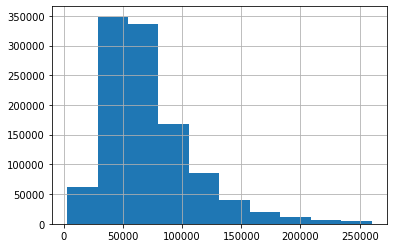

In [ ]:
# 백분위 99까지
df_annual_4 = data[data['annual_inc'] <= 260000]
df_annual_4.annual_inc.hist()

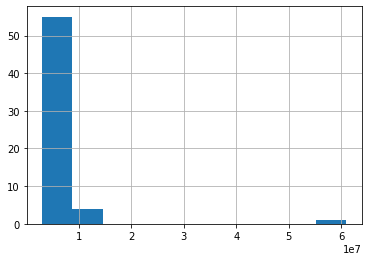

In [ ]:
# 소득의 상위는 어떤지 확인
df_annual_6 = data[data['annual_inc'] >= 3000000]
df_annual_6.annual_inc.hist()

<확인 내용>

1) 3000000 이상의 값에 대해 히스토그램을 확인해 보았을 때, 이상치 확인 가능

2) 엄청난 빈부격차로 인하여 대다수 사람의 연소득이 몰리는 현상이 발생함을 확인

3) 상위 1%를 제외한 데이터로 히스토그램을 그렸을 때, 나아진 히스트그램 확인 가능

4) 연소득 자체로는 유의미한 결과를 얻어내지 못할 것이라 판단 => dti 변수가 유용

이유 : 자신의 연소득 대비 얼마나 큰 금액을 대출하였는지가 관건이기 때문


# **7-중요) 'dti' - 주택담보대출과 신용대출을 제외한 총 채무액에 대한 차입자의 월별 총 상환액을 차입자의 자가신고 연간 소득으로 나눈 비율** 

총 자료 수 : 1,092,919개

최대 : 49.9600

최소 : -1.0000

평균 : 약 18.1811

백분위 25% : 약 11.9200

백분위 50% : 약 17.6800

백분위 75% : 약 24.1000

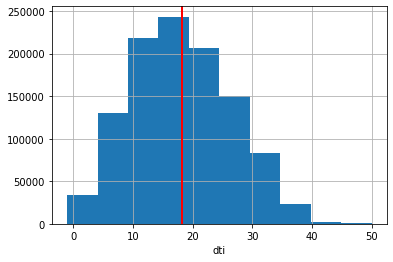

In [ ]:
plt.xlabel("dti")
plt.axvline(x = df_test_part.dti.mean(), linewidth = 2, color = 'r')
data.dti.hist()

dit의 평균이 약 18에 해당, 히스토그램 등을 통해 dti의 값이 1보다 더 큰 값인 경우가 대다수

<유추 내용>

1) 대출을 하는 대부분은 자신의 연간소득 보다 더 대출액이 더 큰 경우가 많음.

**DTI 목적 : DTI의 도입 목적은 대출자의 소득신용 총량에 따라 부채신용의 한도를 설정함으로써 상환여력에 맞게 대출을 이용하도록 유도**

**금융기관의 대출에 있어 대출 건전성과 한도를 설정하는 역할**


<해석 내용>

(돈을 빌린 사람이 매월 갚는 총 금액 / 돈을 빌린 사람의 연간소득) 

1) 1 초과 : 연소득으로 해결 불가능 

2) 1 이하 : 연소득으로 해결 가능 

(대출이 필요없는 사람들 => 실제로 1 이하의 값인 경우는 거의 없음)

- 주택담보대출과 신용대출을 제외했기에 1 이하라고 하더라도 1과 가까운 경우, 주담대와 신용대출이 존재하는 경우에 차입자의 상황이 여유롭다고 볼 수 없음

- 대출을 하는 사람 대부분은 자신의 연소득으로 해결할 수 없는 금액에 대해 대출을 받음

=> **핵심은 연소득 보다 높은 대출금을 갚을 수 있는 능력이 있는가, 어떤 사람에게 DTI의 값을 어느 정도까지 값으로 대출을 해 줄 수 있는지를 고려하게 도와줌**

# **8-고려) 'delinq_2yrs' - 지난 2년 동안 대출자의 신용 파일에서 30일 이상 연체 발생 건수**

#**(30일 이상 돈을 갚지 못한 경우)**

총 자료 수 : 1,092,919개

최대 : 30

최소 : 0

평균 : 약 0.34

백분위 25% : 0

백분위 50% : 0

백분위 75% : 0

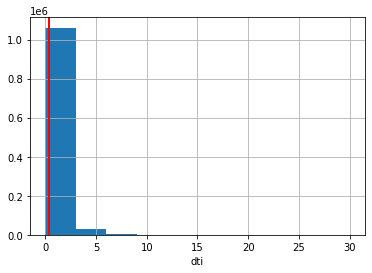

In [ ]:
plt.xlabel("dti")
plt.axvline(x = df_test_part.delinq_2yrs.mean(), linewidth = 2, color = 'r')
data.delinq_2yrs.hist()

In [ ]:
# n번째 연체 발생 건수의 총합
data['delinq_2yrs'].value_counts()

0     870371
1     146230
2      43888
3      16152
4       7342
5       3712
6       2082
7       1155
8        673
9        422
10       298
11       174
12       123
13        91
14        72
15        46
16        27
18        20
17        13
19        10
20         8
21         4
22         3
29         1
24         1
30         1
Name: delinq_2yrs, dtype: int64

연체가 되지 않은 경우가 약 80%에 해당

(870371/1092919 = 0.7963728)

### => **80%에 해당하는 사람이 연체하지 않음**

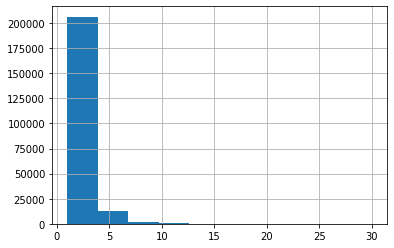

In [ ]:
# 1번 이상의 값만으로 그린 히스토그램
df_delinq_1 = data[data['delinq_2yrs'] >=1]
df_delinq_1.delinq_2yrs.hist()

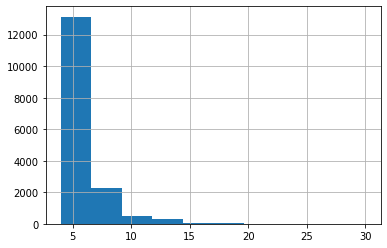

In [ ]:
# 4번 이상의 값만으로 그린 히스토그램
df_delinq_4 = data[data['delinq_2yrs'] >=4]
df_delinq_4.delinq_2yrs.hist()

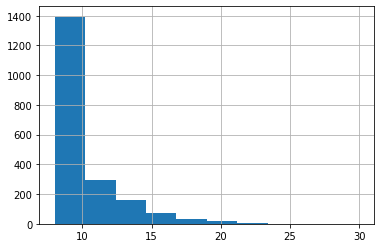

In [ ]:
# 8번 이상의 값만으로 그린 히스토그램
df_delinq_8 = data[data['delinq_2yrs'] >=8]
df_delinq_8.delinq_2yrs.hist()

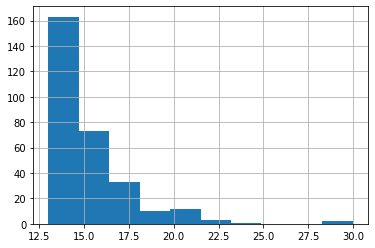

In [ ]:
# 13번 이상의 값만으로 그린 히스토그램
df_delinq_13 = data[data['delinq_2yrs'] >= 13]
df_delinq_13.delinq_2yrs.hist()

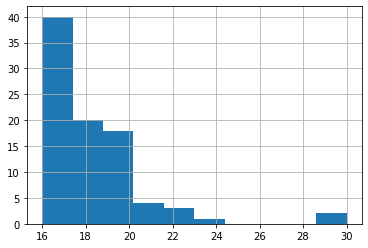

In [ ]:
# 16번 이상의 값만으로 그린 히스토그램
df_delinq_16 = data[data['delinq_2yrs'] >= 16]
df_delinq_16.delinq_2yrs.hist()

범위를 조정한 결과, 이상치 확인 가능

=> 즉 0~22번까지는 값이 존재하고, 29, 30번에 값이 다시 등장

=> 이를 통해 연체횟수가 29번 이상인 경우는 비정상적인 값임을 알 수 있음

### => **연체 건수가 많을수록 결과적으로 불이행(부도) 가능성이 높은지 추후 확인 필요하다고 판단**

### => **만일 건수와 불이행/부도와 상관관계가 나타난다면, 몇건까지가 대출을 해주기에 안정적이라고 볼 것인지에 대한 기준점 판단이 필요**

# **FICO란?**

Credit Score을 반영한 결과값 (미국의 신용평가점수제도)

1) 300 - 850 범위의 값을 가지고 있음

2) 800 이상 : exceptional

3) 740 - 799 : very good

4) 670 - 739 : good(중간)

5) 580 - 669 : fair

6) 580 미만 : poor


Most banks and lenders use the FICO credit score to estimate credit risk. The FICO score ranges from 300-850, and what's considered “good” will vary depending on which credit bureau is reporting your score. Generally, any score above 750 is considered “excellent,” and anything between 700-749 is considered “good.”

출처:lendingclub 홈페이지



<알아낸 정보>

1) 대출을 받고자 하는 사람은 신용 점수에 따라 fico 값이 주워짐

2) fico는 low-high로 2개의 값으로 주워짐

3) low와 high의 값의 차이는 '4'임

4) 따라서 high와 low의 각각의 평균값 등을 보면 4 값이 차이남을 확인할 수 있음

5) 히스토그램 역시 동일한 형태로 나타남


아래 사진은 lending club web에서는 삭제됨

사진 출처 : https://www.doctorofcredit.com/use-lending-club-find-fico-score-range-free/

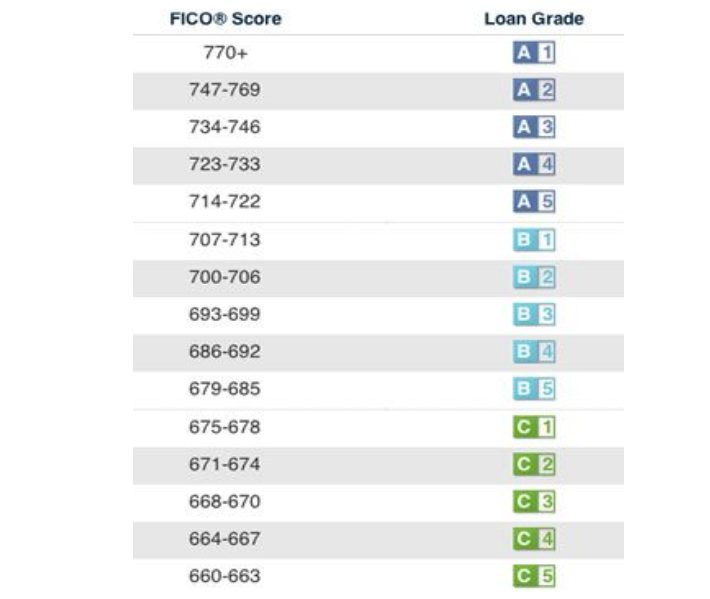

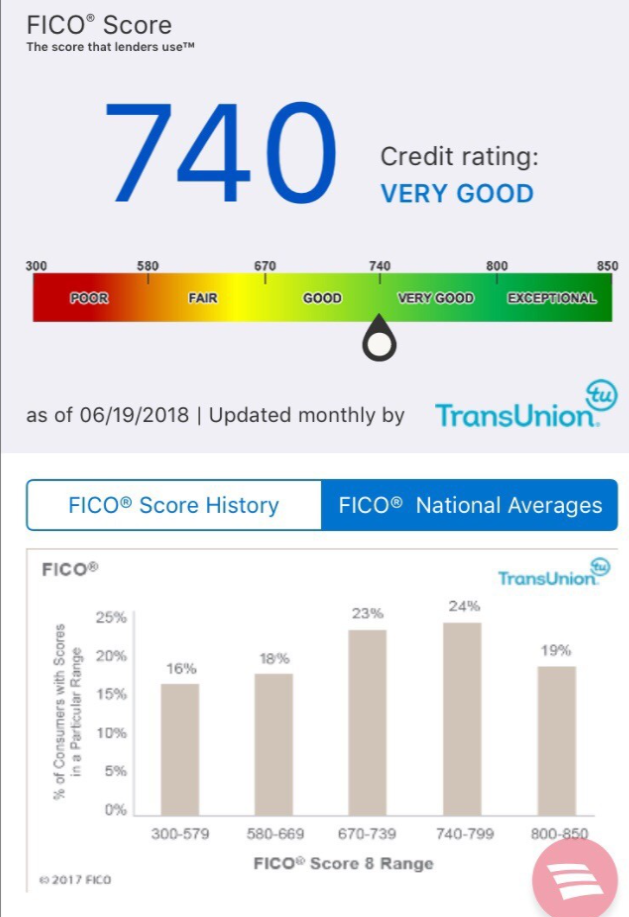

# **중요 - 단, 'fico_range_low' or 'fico_range_high' 중 하나만 고려해도 될 듯**  

# **9) 'fico_range_low' - 대출 시 대출자의 FICO가 속하는 하한 범위**

총 자료 수 : 1,092,919개

최대 : 845

최소 : 660

평균 : 약 694

백분위 25% : 약 670

백분위 50% : 약 685

백분위 75% : 약 710

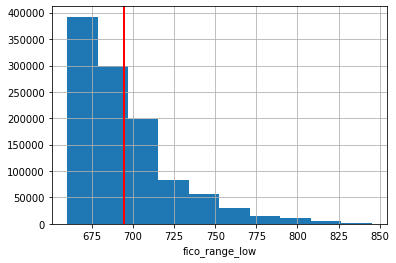

In [ ]:
plt.xlabel("fico_range_low")
plt.axvline(x = df_test_part.fico_range_low.mean(), linewidth = 2, color = 'r')
data.fico_range_low.hist()

# **10) 'fico_range_high' - 대출 시 대출자의 FICO가 속하는 상한 범위**

총 자료 수 : 1,092,919개

최대 : 845

최소 : 664

평균 : 약 698

백분위 25% : 약 674

백분위 50% : 약 689

백분위 75% : 약 714

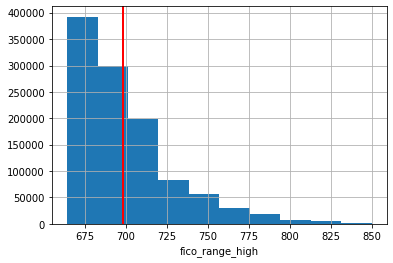

In [ ]:
plt.xlabel("fico_range_high")
plt.axvline(x = df_test_part.fico_range_high.mean(), linewidth = 2, color = 'r')
data.fico_range_high.hist()

# **11-논의필요) 'issue_d' - 대출을 조달하고 지난 기간 (달)**

### **각 isse_d에 대해 히스토그램 확인**

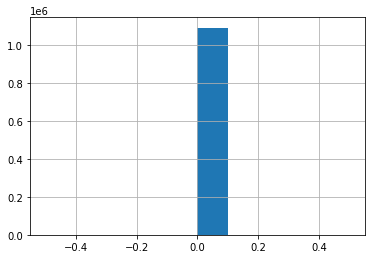

In [ ]:
df_test_part.issue_d1.hist()

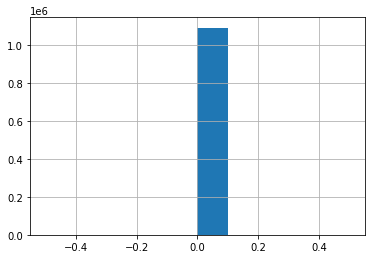

In [ ]:
df_test_part.issue_d2.hist()

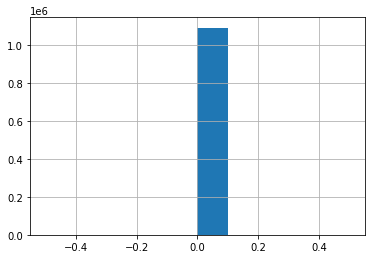

In [ ]:
df_test_part.issue_d50.hist()

### **의미없다고 판단**
### **대안 : issue_d의 각 인덱스에 대한 총합을 구해보자**

In [ ]:
# issue_d 만을 가진 데이터 프레임 생성
df_issue = df_test_part[['issue_d1', 'issue_d2', 'issue_d3', 'issue_d4', 'issue_d5', 'issue_d6', 'issue_d7', 'issue_d8', 'issue_d9', 'issue_d10', 'issue_d11', 'issue_d12', 'issue_d13', 'issue_d14', 'issue_d15', 'issue_d16', 'issue_d17', 'issue_d18', 'issue_d19', 'issue_d20', 'issue_d21', 'issue_d22', 'issue_d23', 'issue_d24', 'issue_d25', 'issue_d26', 'issue_d27', 'issue_d28', 'issue_d29', 'issue_d30', 'issue_d31', 'issue_d32', 'issue_d33', 'issue_d34', 'issue_d35', 'issue_d36', 'issue_d37', 'issue_d38', 'issue_d39', 'issue_d40', 'issue_d41', 'issue_d42', 'issue_d43', 'issue_d44', 'issue_d45', 'issue_d46', 'issue_d47', 'issue_d48', 'issue_d49', 'issue_d50', 'issue_d51', 'issue_d52', 'issue_d53', 'issue_d54', 'issue_d55', 'issue_d56', 'issue_d57', 'issue_d58', 'issue_d59', 'issue_d60', 'issue_d61', 'issue_d62', 'issue_d63', 'issue_d64', 'issue_d65', 'issue_d66', 'issue_d67', 'issue_d68', 'issue_d69', 'issue_d70', 'issue_d71', 'issue_d72', 'issue_d73', 'issue_d74', 'issue_d75', 'issue_d76', 'issue_d77', 'issue_d78', 'issue_d79', 'issue_d80', 'issue_d81', 'issue_d82', 'issue_d83', 'issue_d84', 'issue_d85', 'issue_d86', 'issue_d87', 'issue_d88', 'issue_d89', 'issue_d90', 'issue_d91', 'issue_d92', 'issue_d93', 'issue_d94', 'issue_d95', 'issue_d96', 'issue_d97', 'issue_d98', 'issue_d99', 'issue_d100', 'issue_d101', 'issue_d102', 'issue_d103', 'issue_d104', 'issue_d105', 'issue_d106', 'issue_d107', 'issue_d108', 'issue_d109', 'issue_d110', 'issue_d111', 'issue_d112', 'issue_d113', 'issue_d114', 'issue_d115', 'issue_d116', 'issue_d117', 'issue_d118']]

In [ ]:
# 각 인덱스에 해당하는 값들이 몇개인지 총합 확인
df_issue_sum = df_issue.sum()
pd.set_option('display.max_rows', None)
df_issue_sum

issue_d1          0
issue_d2          0
issue_d3          0
issue_d4          0
issue_d5          0
issue_d6          0
issue_d7          0
issue_d8          0
issue_d9          0
issue_d10         0
issue_d11         0
issue_d12         0
issue_d13         0
issue_d14         0
issue_d15         0
issue_d16         0
issue_d17         0
issue_d18         0
issue_d19         0
issue_d20         0
issue_d21         0
issue_d22         0
issue_d23         0
issue_d24         0
issue_d25         0
issue_d26         0
issue_d27         0
issue_d28         0
issue_d29         0
issue_d30         0
issue_d31         0
issue_d32         0
issue_d33         0
issue_d34         0
issue_d35         0
issue_d36         0
issue_d37         0
issue_d38         0
issue_d39         0
issue_d40         0
issue_d41         0
issue_d42         0
issue_d43         0
issue_d44         0
issue_d45         0
issue_d46         0
issue_d47         0
issue_d48         0
issue_d49         0
issue_d50         0


**issue_d63부터 유의미한 값이 등장**

In [ ]:
# 총합에 대한 데이터 분석
df_issue_sum.describe([.25, .50, 0.52, 0.53, .65, .75, 0.85, 0.95])

count      118.000000
mean      9262.025424
std      11589.514458
min          0.000000
25%          0.000000
50%          0.000000
52%          0.000000
53%        958.950000
65%      12675.850000
75%      19058.500000
85%      24281.200000
95%      29423.550000
max      43927.000000
dtype: float64

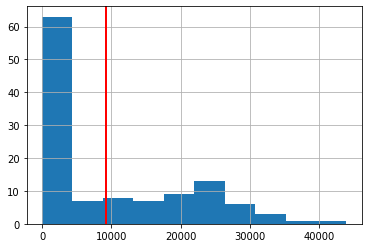

In [ ]:
# 총합의 결과를 바탕으로 히스토그램 확인해보기
plt.axvline(x = df_issue_sum.mean(), linewidth = 2, color = 'r')
df_issue_sum.hist()

###**0 값을 제외한 issue_d의 히스토그램 그려보기**

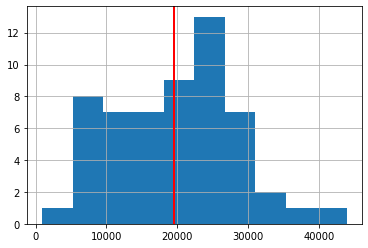

In [ ]:
# 0 값을 제외한 결과, 히스토그램 확인
df_issue_sum_1 = df_issue_sum[df_issue_sum > 0]
plt.axvline(x = df_issue_sum_1.mean(), linewidth = 2, color = 'r')
df_issue_sum_1.hist()

In [ ]:
df_issue_sum_1.describe()

count       56.000000
mean     19516.410714
std       9053.234873
min        908.000000
25%      12471.250000
50%      19297.000000
75%      25260.000000
max      43927.000000
dtype: float64

**대출을 조달하고 얼마나 긴 시간이 지났는지에 따라 불이행/부도를 예측하는 것보다, 기간과 상관없이 연체된 횟수 등을 통해서 확인하는게 차라리 좋지 않을까하는 생각**

##**최종** 

1) 중요 

: loan_amnt, int_rate, dti, fico_range_low, fico_range_high

2) 고려/논의필요 

: delinq_2yrs (-), issue_d (X)

3) 중요 X 

: funded_amnt, funded_amnt_inv, installment, annual_inc
